#📌 Extracción

In [357]:
import pandas as pd
import numpy as np

datos_telecom = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

df = pd.read_json(datos_telecom)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [358]:
costumer_norm = pd.json_normalize(df['customer'])#.add_prefix('customer_')
phone_norm = pd.json_normalize(df['phone'])#.add_prefix('phone_')
internet_norm = pd.json_normalize(df['internet'])#.add_prefix('internet_')
account_norm = pd.json_normalize(df['account'])#.add_prefix('account_')

telecom_df = pd.concat([df.drop(columns=['customer', 'phone', 'internet', 'account']), costumer_norm, phone_norm, internet_norm, account_norm], axis=1)
telecom_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [359]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#🔧 Transformación

In [360]:
# Check unique values per column
for col in telecom_df.columns:
    print(f"\nColumn: {col}")
    print(telecom_df[col].unique()[:20])  # show first 20 unique values
    print(f"Unique count: {telecom_df[col].nunique()}")



Column: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' '0011-IGKFF' '0013-EXCHZ'
 '0013-MHZWF' '0013-SMEOE' '0014-BMAQU' '0015-UOCOJ' '0016-QLJIS'
 '0017-DINOC' '0017-IUDMW' '0018-NYROU' '0019-EFAEP' '0019-GFNTW'
 '0020-INWCK' '0020-JDNXP' '0021-IKXGC' '0022-TCJCI' '0023-HGHWL']
Unique count: 7267

Column: Churn
['No' 'Yes' '']
Unique count: 3

Column: gender
['Female' 'Male']
Unique count: 2

Column: SeniorCitizen
[0 1]
Unique count: 2

Column: Partner
['Yes' 'No']
Unique count: 2

Column: Dependents
['Yes' 'No']
Unique count: 2

Column: tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69]
Unique count: 73

Column: PhoneService
['Yes' 'No']
Unique count: 2

Column: MultipleLines
['No' 'Yes' 'No phone service']
Unique count: 3

Column: InternetService
['DSL' 'Fiber optic' 'No']
Unique count: 3

Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Unique count: 3

Column: OnlineBackup
['Yes' 'No' 'No internet service']
Unique count: 3

Column: DeviceProtection


In [361]:
# 1. Fix Churn column (replace empty strings with NaN)
telecom_df['Churn'] = telecom_df['Churn'].replace('', pd.NA)

# 2. Standardize 'No internet service' and 'No phone service'
cols_replace = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_replace:
    telecom_df[col] = telecom_df[col].replace(
        {'No internet service': 'No', 'No phone service': 'No'}
    )

# 3. Convert Charges.Total to numeric
telecom_df['Charges.Total'] = pd.to_numeric(telecom_df['Charges.Total'], errors='coerce')

# 4. Strip whitespace for all object columns
telecom_df = telecom_df.map(lambda x: x.strip() if isinstance(x, str) else x)

print(telecom_df)

      customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0     0002-ORFBO    No  Female              0     Yes        Yes       9   
1     0003-MKNFE    No    Male              0      No         No       9   
2     0004-TLHLJ   Yes    Male              0      No         No       4   
3     0011-IGKFF   Yes    Male              1     Yes         No      13   
4     0013-EXCHZ   Yes  Female              1     Yes         No       3   
...          ...   ...     ...            ...     ...        ...     ...   
7262  9987-LUTYD    No  Female              0      No         No      13   
7263  9992-RRAMN   Yes    Male              0     Yes         No      22   
7264  9992-UJOEL    No    Male              0      No         No       2   
7265  9993-LHIEB    No    Male              0     Yes        Yes      67   
7266  9995-HOTOH    No    Male              0     Yes        Yes      63   

     PhoneService MultipleLines InternetService  ... OnlineBackup  \
0             Yes 

In [362]:
print("Missing values per column after cleaning:")
print(telecom_df.isna().sum().sort_values(ascending=False))

Missing values per column after cleaning:
Churn               224
Charges.Total        11
customerID            0
SeniorCitizen         0
gender                0
Partner               0
Dependents            0
PhoneService          0
tenure                0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
MultipleLines         0
DeviceProtection      0
TechSupport           0
StreamingMovies       0
StreamingTV           0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
dtype: int64


In [363]:
for col in telecom_df.select_dtypes(include="object").columns:
    telecom_df[col] = telecom_df[col].astype(str).str.lower()


In [364]:
telecom_df = telecom_df.rename(columns={'customerID': 'CustomerID'})
telecom_df = telecom_df.rename(columns={'Churn': 'CustomerChurn'})
telecom_df = telecom_df.rename(columns={'gender': 'Gender'})
telecom_df = telecom_df.rename(columns={'tenure': 'Tenure'})
telecom_df = telecom_df.rename(columns={'Charges.Monthly': 'ChargesMonthly'})
telecom_df = telecom_df.rename(columns={'Charges.Total': 'ChargesTotal'})

telecom_df = telecom_df.fillna("N/A")

print(telecom_df)

      CustomerID CustomerChurn  Gender  SeniorCitizen Partner Dependents  \
0     0002-orfbo            no  female              0     yes        yes   
1     0003-mknfe            no    male              0      no         no   
2     0004-tlhlj           yes    male              0      no         no   
3     0011-igkff           yes    male              1     yes         no   
4     0013-exchz           yes  female              1     yes         no   
...          ...           ...     ...            ...     ...        ...   
7262  9987-lutyd            no  female              0      no         no   
7263  9992-rramn           yes    male              0     yes         no   
7264  9992-ujoel            no    male              0      no         no   
7265  9993-lhieb            no    male              0     yes        yes   
7266  9995-hotoh            no    male              0     yes        yes   

      Tenure PhoneService MultipleLines InternetService  ... OnlineBackup  \
0         

In [365]:
print("Missing values per column after cleaning:")
print(telecom_df.isna().sum().sort_values(ascending=False))

Missing values per column after cleaning:
CustomerID          0
CustomerChurn       0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
ChargesMonthly      0
ChargesTotal        0
dtype: int64


In [366]:
telecom_df['ChargesDaily'] = (telecom_df['ChargesMonthly'] / 30).round(2)
print(telecom_df[['ChargesMonthly', 'ChargesDaily']].head())

   ChargesMonthly  ChargesDaily
0            65.6          2.19
1            59.9          2.00
2            73.9          2.46
3            98.0          3.27
4            83.9          2.80


In [367]:
yes_no_map = {"yes": 1, "no": 0}

# Columns with yes/no values
yes_no_cols = [
    "CustomerChurn", "Partner", "Dependents", "PhoneService", "MultipleLines",
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling"
]

# --- 1. Lowercase first ---
for col in yes_no_cols:
    telecom_df[col] = telecom_df[col].astype(str).str.lower()

# --- 2. Handle Churn explicitly (yes=1, no=0, n/a=-1) ---
telecom_df['CustomerChurn'] = telecom_df['CustomerChurn'].map({
    "yes": 1,
    "no": 0,
    "n/a": -1
}).fillna(-1).astype("int8")   # Replace any stray NaN with -1

# --- 3. Apply mapping to other yes/no cols ---
for col in yes_no_cols:
    if col != "CustomerChurn":   # already handled above
        telecom_df[col] = telecom_df[col].map(yes_no_map).fillna(-1).astype("int8")

# --- 4. Verify ---
for col in yes_no_cols:
    print(f"{col}: {telecom_df[col].unique()} (dtype={telecom_df[col].dtype})")


CustomerChurn: [ 0  1 -1] (dtype=int8)
Partner: [1 0] (dtype=int8)
Dependents: [1 0] (dtype=int8)
PhoneService: [1 0] (dtype=int8)
MultipleLines: [0 1] (dtype=int8)
OnlineSecurity: [0 1] (dtype=int8)
OnlineBackup: [1 0] (dtype=int8)
DeviceProtection: [0 1] (dtype=int8)
TechSupport: [1 0] (dtype=int8)
StreamingTV: [1 0] (dtype=int8)
StreamingMovies: [0 1] (dtype=int8)
PaperlessBilling: [1 0] (dtype=int8)


In [368]:
for col in telecom_df.columns:
    print(f"\nColumn: {col}")
    print(telecom_df[col].unique()[:5])
    print(f"Unique count: {telecom_df[col].nunique()}")


Column: CustomerID
['0002-orfbo' '0003-mknfe' '0004-tlhlj' '0011-igkff' '0013-exchz']
Unique count: 7267

Column: CustomerChurn
[ 0  1 -1]
Unique count: 3

Column: Gender
['female' 'male']
Unique count: 2

Column: SeniorCitizen
[0 1]
Unique count: 2

Column: Partner
[1 0]
Unique count: 2

Column: Dependents
[1 0]
Unique count: 2

Column: Tenure
[ 9  4 13  3 71]
Unique count: 73

Column: PhoneService
[1 0]
Unique count: 2

Column: MultipleLines
[0 1]
Unique count: 2

Column: InternetService
['dsl' 'fiber optic' 'no']
Unique count: 3

Column: OnlineSecurity
[0 1]
Unique count: 2

Column: OnlineBackup
[1 0]
Unique count: 2

Column: DeviceProtection
[0 1]
Unique count: 2

Column: TechSupport
[1 0]
Unique count: 2

Column: StreamingTV
[1 0]
Unique count: 2

Column: StreamingMovies
[0 1]
Unique count: 2

Column: Contract
['one year' 'month-to-month' 'two year']
Unique count: 3

Column: PaperlessBilling
[1 0]
Unique count: 2

Column: PaymentMethod
['mailed check' 'electronic check' 'credit c

#📊 Carga y análisis

In [369]:
# Descriptive statistics for numerical features
print("\n===== Descriptive Statistics: Numerical Features =====")
numeric_summary = telecom_df.describe().T  # Transpose for readability
print(numeric_summary)

# Descriptive statistics for categorical (non-numeric) features
print("\n===== Descriptive Statistics: Categorical Features =====")
categorical_summary = telecom_df.describe(include=['object'])
print(categorical_summary)

# Median and variance for numeric columns
print("\n===== Extra Stats: Median & Variance (Numerical Features) =====")
extra_stats = telecom_df[numeric_summary.index].agg(['median', 'var']).T
print(extra_stats)

# Churn distribution
print("\n===== Churn Distribution (%) =====")
churn_dist = telecom_df['CustomerChurn'].value_counts(normalize=True) * 100
print(churn_dist)


===== Descriptive Statistics: Numerical Features =====
                   count       mean        std    min     25%    50%     75%  \
CustomerChurn     7267.0   0.226366   0.486627  -1.00   0.000   0.00   1.000   
SeniorCitizen     7267.0   0.162653   0.369074   0.00   0.000   0.00   0.000   
Partner           7267.0   0.484106   0.499782   0.00   0.000   0.00   1.000   
Dependents        7267.0   0.300124   0.458343   0.00   0.000   0.00   1.000   
Tenure            7267.0  32.346498  24.571773   0.00   9.000  29.00  55.000   
PhoneService      7267.0   0.902711   0.296371   0.00   1.000   1.00   1.000   
MultipleLines     7267.0   0.421770   0.493876   0.00   0.000   0.00   1.000   
OnlineSecurity    7267.0   0.285950   0.451897   0.00   0.000   0.00   1.000   
OnlineBackup      7267.0   0.344571   0.475261   0.00   0.000   0.00   1.000   
DeviceProtection  7267.0   0.342782   0.474672   0.00   0.000   0.00   1.000   
TechSupport       7267.0   0.289528   0.453575   0.00   0.000   

In [370]:
# Base descriptive stats
numeric_summary = telecom_df.describe().T

# Add median & variance
numeric_summary['median'] = telecom_df[numeric_summary.index].median()
numeric_summary['var'] = telecom_df[numeric_summary.index].var()

# Display combined summary
print("\n===== Combined Summary Table: Numerical Features =====")
print(numeric_summary)


===== Combined Summary Table: Numerical Features =====
                   count       mean        std    min     25%    50%     75%  \
CustomerChurn     7267.0   0.226366   0.486627  -1.00   0.000   0.00   1.000   
SeniorCitizen     7267.0   0.162653   0.369074   0.00   0.000   0.00   0.000   
Partner           7267.0   0.484106   0.499782   0.00   0.000   0.00   1.000   
Dependents        7267.0   0.300124   0.458343   0.00   0.000   0.00   1.000   
Tenure            7267.0  32.346498  24.571773   0.00   9.000  29.00  55.000   
PhoneService      7267.0   0.902711   0.296371   0.00   1.000   1.00   1.000   
MultipleLines     7267.0   0.421770   0.493876   0.00   0.000   0.00   1.000   
OnlineSecurity    7267.0   0.285950   0.451897   0.00   0.000   0.00   1.000   
OnlineBackup      7267.0   0.344571   0.475261   0.00   0.000   0.00   1.000   
DeviceProtection  7267.0   0.342782   0.474672   0.00   0.000   0.00   1.000   
TechSupport       7267.0   0.289528   0.453575   0.00   0.000   

In [371]:
# Distribution of churn values
churn_counts = telecom_df['CustomerChurn'].value_counts().reset_index()
churn_counts.columns = ['CustomerChurn', 'Count']

# Add percentage column
churn_counts['Percentage'] = ((churn_counts['Count'] / churn_counts['Count'].sum()) * 100).round(0)

print("\n===== Customer Churn Distribution DataFrame =====")
print(churn_counts)


===== Customer Churn Distribution DataFrame =====
   CustomerChurn  Count  Percentage
0              0   5174        71.0
1              1   1869        26.0
2             -1    224         3.0


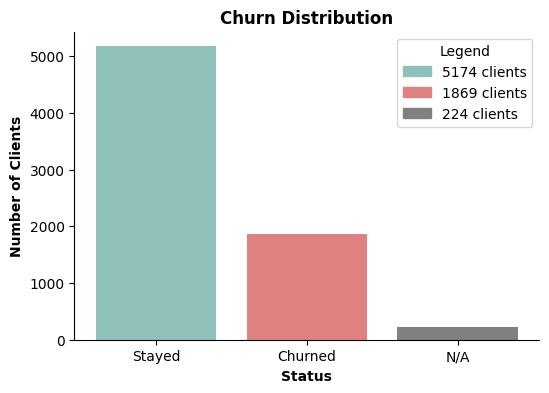

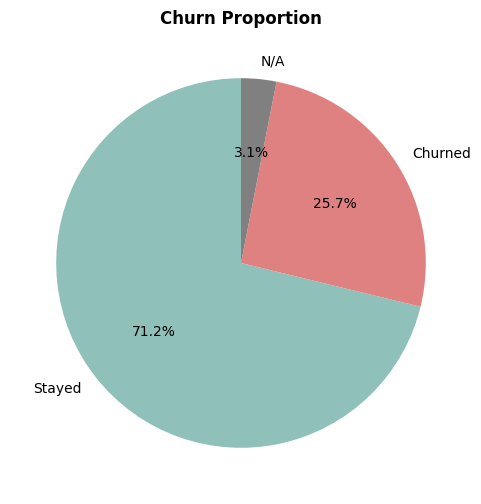

In [380]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Map churn values for clarity
label_map = {0: "Stayed", 1: "Churned", -1: "N/A"}
churn_counts['ChurnLabel'] = churn_counts['CustomerChurn'].map(label_map)

# --- Bar chart ---
plt.figure(figsize=(6,4))
ax = plt.gca()  # get current axes

colors = ['#8fc0b9','#e08181','gray']
bars = plt.bar(churn_counts['ChurnLabel'], churn_counts['Count'], color=colors)

plt.title("Churn Distribution", fontweight='bold')
plt.xlabel("Status", fontweight='bold')
plt.ylabel("Number of Clients", fontweight='bold')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Create legend handles with counts
handles = [
    mpatches.Patch(color=color, label=f"{count} clients")
    for color, count in zip(colors, churn_counts['Count'])
]

plt.legend(handles=handles, title="Legend", loc="upper right")

plt.show()

# --- Pie chart ---
plt.figure(figsize=(6,6))
plt.pie(
    churn_counts['Count'],
    labels=churn_counts['ChurnLabel'],
    autopct='%1.1f%%',
    colors=colors,
    startangle=90
)

plt.title("Churn Proportion", fontweight='bold')
plt.show()

In [383]:
# Function to calculate churn distribution by category (counts + %)
def churn_by_category(df, column):
    churn_stats = (
        df.groupby(column)['CustomerChurn']
        .value_counts()
        .rename("count")
        .reset_index()
    )
    total_per_group = churn_stats.groupby(column)["count"].transform("sum")
    churn_stats["percentage"] = (churn_stats["count"] / total_per_group) * 100
    return churn_stats

# --- Run analysis for ALL categorical variables except CustomerID ---
categorical_cols = telecom_df.select_dtypes(include='object').columns.tolist()

# Remove CustomerID if present
if "customerid" in categorical_cols:   # handle lowercase naming
    categorical_cols.remove("customerid")
elif "CustomerID" in categorical_cols: # handle original naming
    categorical_cols.remove("CustomerID")

for col in categorical_cols:
    print(f"\n===== Churn by {col.capitalize()} =====")
    print(churn_by_category(telecom_df, col))




===== Churn by Gender =====
   Gender  CustomerChurn  count  percentage
0  female              0   2549   70.963252
1  female              1    939   26.141425
2  female             -1    104    2.895323
3    male              0   2625   71.428571
4    male              1    930   25.306122
5    male             -1    120    3.265306

===== Churn by Internetservice =====
  InternetService  CustomerChurn  count  percentage
0             dsl              0   1962   78.858521
1             dsl              1    459   18.448553
2             dsl             -1     67    2.692926
3     fiber optic              0   1799   56.253909
4     fiber optic              1   1297   40.556598
5     fiber optic             -1    102    3.189493
6              no              0   1413   89.373814
7              no              1    113    7.147375
8              no             -1     55    3.478811

===== Churn by Contract =====
         Contract  CustomerChurn  count  percentage
0  month-to-month     

#📄Informe final